In [173]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
import plotly.graph_objects as go

from constants import INVESTMENT_TYPE
from mysql_conn import MySQL
from models.investment import Investment
from models.stock import Stock

## Carregando dados

In [2]:
acoes = pd.read_csv(os.path.join('..', 'data', '%s.csv' % datetime.today().strftime('%Y_%m_%d')))

In [3]:
acoes

,date,high,low,adjusted_close,dollar,nome
0,2019-09-10,15.150,14.750,15.15,4.0805,CPFL Energia
1,2019-09-11,15.690,15.230,15.57,4.0673,CPFL Energia
2,2019-09-12,15.835,15.660,15.73,4.0599,CPFL Energia
3,2019-09-13,15.680,15.380,15.43,4.0840,CPFL Energia
4,2019-09-16,15.650,15.400,15.40,4.0799,CPFL Energia
...,...,...,...,...,...,...
2199,2020-11-18,19.730,19.080,19.37,5.3629,Azul SA
2200,2020-11-18,18.330,17.670,17.71,5.3629,Cosan Ltd
2201,2020-11-18,7.370,7.135,7.18,5.3629,Banco Santander Brasil SA
2202,2020-11-18,6.200,6.200,6.20,5.3629,CTEEP Companhia de Transmissao de Energia Elet...


In [4]:
acoes.describe()

,high,low,adjusted_close,dollar
count,2204.000000,2204.000000,2204.000000,2204.000000
mean,8.007994,7.806519,7.876360,5.384645
std,7.993875,7.911708,7.952044,0.319723
min,0.000800,0.000700,0.000700,3.987500
25%,2.350000,2.250000,2.317500,5.320200
50%,5.815000,5.585000,5.660790,5.414400
75%,12.102575,11.688250,11.862500,5.593000
max,39.561000,39.561000,39.561000,5.778100


## Separação conjunto de testes

In [162]:
data = acoes.loc[acoes['nome'] == 'Azul SA']

In [163]:
data

,date,high,low,adjusted_close,dollar,nome
177,2020-06-30,11.2700,10.95,11.18,5.4627,Azul SA
202,2020-07-01,12.0500,11.23,11.61,5.3172,Azul SA
227,2020-07-02,12.3300,11.52,11.61,5.3596,Azul SA
237,2020-07-06,12.3300,12.00,12.30,5.3542,Azul SA
259,2020-07-07,12.5600,11.90,11.93,5.3790,Azul SA
...,...,...,...,...,...,...
2140,2020-11-12,16.5400,15.28,15.35,5.4533,Azul SA
2149,2020-11-13,16.0400,15.58,16.04,5.4551,Azul SA
2174,2020-11-16,18.1800,16.59,17.80,5.4339,Azul SA
2194,2020-11-17,18.7099,17.82,18.48,5.4339,Azul SA


In [164]:
# Separar a variavel alvo (target) do conjunto de dados
Y = data['adjusted_close']
# X = azul_sa.drop(['adjusted_close', 'date'], axis=1)
# feature_names = X.columns
# print(X.shape, Y.shape)

In [165]:
X = features.fit_transform(data[['high', 'low', 'dollar']])

In [166]:
features = PolynomialFeatures(degree=4)

In [167]:
X.shape

(100, 35)

In [169]:
# Everything here should also look familiar
full_polynomial_model = LinearRegression()
full_polynomial_model.fit(X, Y)

print("The model explains {:.2f}% of the average price.".format(full_polynomial_model.score(X, Y)*100))

The model explains 98.04% of the average price.


In [170]:
a = full_polynomial_model.coef_
b = full_polynomial_model.intercept_

predictions = a @ X.T + b

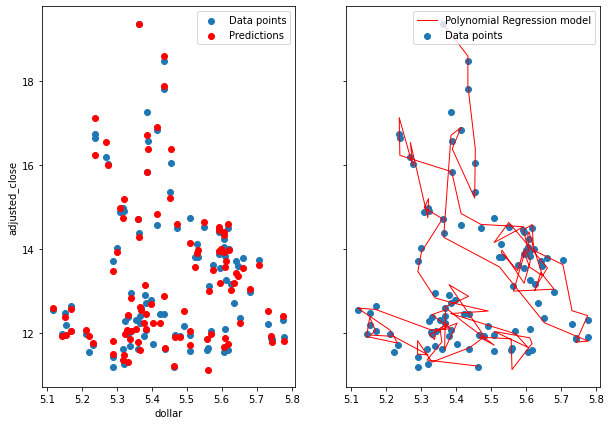

In [175]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,7), sharex=True, sharey=True)

# We do not need to plot against LSTAT2, just LSTAT
ax0.scatter(data["dollar"], Y, label="Data points")
ax1.scatter(data["dollar"], Y, label="Data points")

ax0.scatter(data["dollar"], predictions.reshape((X.shape[0],)),
         color='red', lw=1, label="Predictions")

ax1.plot(data["dollar"], predictions.reshape((X.shape[0],)),
         color='red', lw=1, label="Polynomial Regression model")


# Some plotting parameters to make the plot look nicer
ax0.set_xlabel("dollar")
ax0.set_ylabel("adjusted_close")
ax0.legend();
ax1.legend();

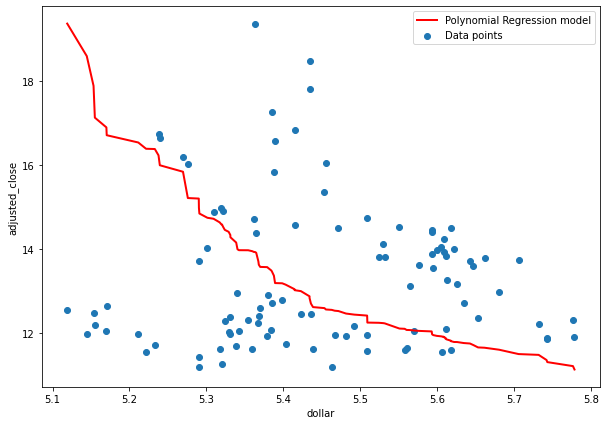

In [174]:
plt.figure(figsize=(10,7))

# We do not need to plot against LSTAT2, just LSTAT
plt.scatter(data['dollar'], Y, label="Data points")

# This is INCORRECT because it losses the real 
# mapping from data to prediction,a but I believe 
# it gives us a better picture of the model
plt.plot(sorted(data['dollar']), sorted(predictions.reshape((X.shape[0],)), reverse=True),
         color='red', lw=2, label="Polynomial Regression model")

# Some plotting parameters to make the plot look nicer
plt.xlabel("dollar")
plt.ylabel("adjusted_close")
plt.legend();

In [153]:
fig = px.scatter(azul_sa, x='adjusted_close', y='adjusted_close', opacity=0.65)
# fig.add_traces(go.Scatter(x=X, y=predictions.reshape((70,), name='Polynomial Regression Fit'))

fig.show()

In [151]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()